In [1]:
#### This file contains the implementation of KNN Classifier for the Digit Recognition Dataset.
#### A detailed analysis is given step by step on how to determine the optimal value of K and find the accuracy.
#### The following libraries are used for this implementation.
#### @Author:Chaitanya Sri Krishna Lolla.
import csv
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## This is responsible for formation of the input data.
with open('optdigits_raining.csv') as trainingFile:
    reader = csv.reader(trainingFile)
    X= []
    Y= []
    
    for row in reader:
        X.append(row[:64])
        Y.append(row[64])
    

for i in range(0,len(X)):
    lst = X[i]
    for j in range(0,len(lst)):
        lst[j] = int(lst[j])
    X[i] = lst
for i in range(0,len(Y)):
    Y[i] = int(Y[i])

print("Done with Loading the Training Data.")

Done with Loading the Training Data.


In [2]:
### The above training dataset is split into two folds for Hyper parameter K tuning.
### The first fold contains 70% of the Training dataset and remaning 30% of the data is used for Cross Validation.
### The below code is responsible for forming the Training and Validation datasets into two folds Fold1 and Fold 2.
import math
length_TrainingSet = len(X)
percentage_training = 0.7
len_train = math.floor(length_TrainingSet * percentage_training);

X_train = X[:len_train]
Y_train = Y[:len_train]
print("Done with forming the Fold 1 for Training Dataset.")

X_validation = X[len_train:len(X)]
Y_validation = Y[len_train:len(Y)]
print("Done with forming the Fold 2 for Validation Dataset.")

Done with forming the Fold 1 for Training Dataset.
Done with forming the Fold 2 for Validation Dataset.


In [3]:
#### For values K = 1 to 10, the training is being done and tested the accuracy on validation dataset.
k= [1,2,3,4,5,6,7,8,9,10]
accuracy_validation = []
for i in range(0,len(k)):
    kValue = k[i]
    clf = KNeighborsClassifier(n_neighbors=kValue, weights='distance')
    clf = clf.fit(X_train,Y_train)
    print("Classification is Done.")

    output_Predicted = clf.predict(X_train);
    accuracy_training = metrics.accuracy_score(output_Predicted,Y_train)
    print("Accuracy on the Training Data set with k %d:" % kValue)
    print(accuracy_training* 100)

    output_predicted_validation = clf.predict(X_validation)
    accuracy_2ndFold = metrics.accuracy_score(output_predicted_validation,Y_validation)
    accuracy_validation.append(accuracy_2ndFold)
    print("Accuracy on the Validation Data set is with k %d: " % kValue)
    print(accuracy_2ndFold * 100)


Classification is Done.
Accuracy on the Training Data set with k 1:
100.0
Accuracy on the Validation Data set is with k 1: 
98.5178727114
Classification is Done.
Accuracy on the Training Data set with k 2:
100.0
Accuracy on the Validation Data set is with k 2: 
98.5178727114
Classification is Done.
Accuracy on the Training Data set with k 3:
100.0
Accuracy on the Validation Data set is with k 3: 
98.256320837
Classification is Done.
Accuracy on the Training Data set with k 4:
100.0
Accuracy on the Validation Data set is with k 4: 
98.4306887533
Classification is Done.
Accuracy on the Training Data set with k 5:
100.0
Accuracy on the Validation Data set is with k 5: 
98.0819529207
Classification is Done.
Accuracy on the Training Data set with k 6:
100.0
Accuracy on the Validation Data set is with k 6: 
98.5178727114
Classification is Done.
Accuracy on the Training Data set with k 7:
100.0
Accuracy on the Validation Data set is with k 7: 
98.1691368788
Classification is Done.
Accuracy on

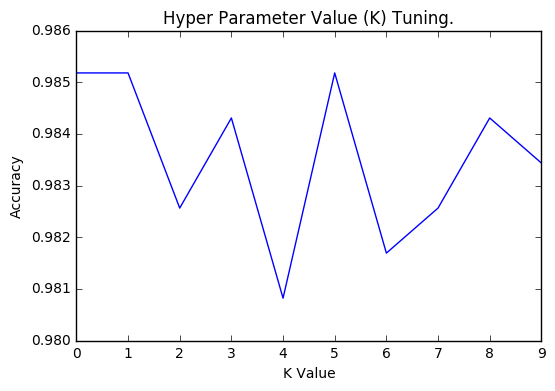

In [7]:
### From the above to determine the maximum peak of accuracy for better K value a plot is being drawn.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
accuracy_validation= np.array(accuracy_validation);
plt.plot(accuracy_validation)
plt.title("Hyper Parameter Value (K) Tuning.")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

In [5]:
### From above graph we can say K Value for 5 is giving best accuracy on Validation dataset.
### Hence we will be training the Model with K=5.
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf = clf.fit(X_train,Y_train)
print("Classification is Done.")

Classification is Done.


In [6]:
### This code is responsible for formation of the Testing dataset.
with open('optdigits_test.csv') as testingFile:
    reader = csv.reader(testingFile)
    
    X_test=[]
    Y_test=[]
    
    for row in reader:
        X_test.append(row[:64])
        Y_test.append(row[64])
        
for i in range(0,len(X_test)):
    lst = X_test[i]
    for j in range(0,len(lst)):
        lst[j] = float(int(lst[j]))
    X_test[i] = lst
for j in range(0,len(Y_test)):
    Y_test[j] = float(int(Y_test[j]))

print("Done forming the Testing Dataset.")


### Prediction on the Testing Dataset.
output_predicted_testing = clf.predict(X_test)
accuracy_testing = metrics.accuracy_score(output_predicted_testing, Y_test)
print("Accuracy on the Testing Dataset is : ")
print(accuracy_testing*100)

Done forming the Testing Dataset.
Accuracy on the Testing Dataset is : 
97.8297161937
